In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mydata=pd.read_csv("C:/Users/DIVYA/Downloads/di.csv")
mydata.drop(['currentSmoker','education','diaBP','heartRate'],axis=1,inplace=True)

In [3]:
mean = mydata['glucose'].mean()
mydata['glucose'].fillna(mean, inplace=True)

mean = mydata['totChol'].mean()
mydata['totChol'].fillna(mean, inplace=True)

mean = mydata['BMI'].mean()
mydata['BMI'].fillna(mean, inplace=True)

mean = mydata['cigsPerDay'].mean()
mydata['cigsPerDay'].fillna(mean, inplace=True)

In [4]:
def missing_cat(series):
    mode=series.value_counts().index[0]
    series=series.fillna(mode)
    return series

for x in mydata:
    mydata[x]=missing_cat(mydata[x])

In [5]:
mydata.corr()

,Unnamed: 0,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,glucose,TenYearCHD
Unnamed: 0,1.000000,0.012481,0.011773,0.004909,0.022549,0.035221,0.024818,0.008877,-0.009751,0.008497,-0.000724,-0.025843,-0.011045
male,0.012481,1.000000,-0.001357,0.312436,-0.041406,0.016096,0.046580,0.009562,-0.045958,0.025992,0.157492,0.001864,0.103260
age,0.011773,-0.001357,1.000000,-0.175847,0.094269,0.044106,0.276604,0.031363,0.275178,0.371426,0.131615,0.078483,0.213271
cigsPerDay,0.004909,0.312436,-0.175847,1.000000,-0.043080,-0.021950,-0.038459,-0.011356,-0.014587,-0.057677,-0.070858,-0.071700,0.067774
BPMeds,0.022549,-0.041406,0.094269,-0.043080,1.000000,0.100996,0.239171,0.012508,0.034917,0.181589,0.066747,-0.024466,0.045949
prevalentStroke,0.035221,0.016096,0.044106,-0.021950,0.100996,1.000000,0.072944,-0.005648,-0.004554,0.061215,-0.001836,-0.006964,0.063813
prevalentHyp,0.024818,0.046580,0.276604,-0.038459,0.239171,0.072944,1.000000,0.043514,0.145946,0.686283,0.248819,0.039468,0.140408
diabetes,0.008877,0.009562,0.031363,-0.011356,0.012508,-0.005648,0.043514,1.000000,0.006658,0.039574,0.005625,0.047820,0.017703
totChol,-0.009751,-0.045958,0.275178,-0.014587,0.034917,-0.004554,0.145946,0.006658,1.000000,0.200783,0.155458,0.010922,0.067887
sysBP,0.008497,0.025992,0.371426,-0.057677,0.181589,0.061215,0.686283,0.039574,0.200783,1.000000,0.273463,0.065837,0.169210


In [7]:
mydata.rename(columns={'male':'Gender'},inplace=True)

In [8]:
def vif_cal(input_data,dependent_col):
    import statsmodels.formula.api as sm
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x",data=x_vars).fit().rsquared
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], "VIF =" , vif)
        
vif_cal(input_data=mydata, dependent_col="TenYearCHD")

C:\Users\DIVYA\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


Unnamed: 0 VIF = 1.0
Gender VIF = 1.16
age VIF = 1.27
cigsPerDay VIF = 1.17
BPMeds VIF = 1.08
prevalentStroke VIF = 1.02
prevalentHyp VIF = 1.96
diabetes VIF = 1.0
totChol VIF = 1.12
sysBP VIF = 2.08
BMI VIF = 1.15
glucose VIF = 1.02


In [10]:
feature_cols = ['Gender', 'age', 'cigsPerDay','prevalentStroke', 'prevalentHyp',
                'diabetes', 'totChol', 'sysBP', 'BMI','glucose']

X = mydata[feature_cols]
Y = mydata.TenYearCHD

In [11]:
import sklearn.model_selection as ms
import sklearn.preprocessing as pre
import sklearn.linear_model as lm
from sklearn.preprocessing import StandardScaler

In [12]:
X = pre.minmax_scale(X)
X.shape

(3701, 10)

In [13]:
scaler = StandardScaler()
features_standardized = scaler.fit_transform(X)

In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
for i in enumerate(X):
    if X.dtype=='object':
        X=labe_encoder.fit_transform((X))

In [15]:
x_train,x_test,y_train,y_test = ms.train_test_split(X,Y,test_size=0.3,random_state=0)

In [16]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2590, 10), (1111, 10), (2590,), (1111,))

In [82]:
classifier=lm.LogisticRegression(random_state=0,class_weight="None",fit_intercept=True,intercept_scaling=1)
classifier.fit(x_train,y_train)
THRESHOLD = 0.16
y_pred = np.where(classifier.predict_proba(x_test)[:,1]>THRESHOLD,1,0)

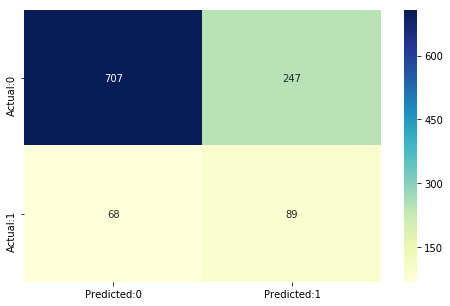

In [83]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")

In [84]:
(conf_matrix/len(y_test))*100

,Predicted:0,Predicted:1
Actual:0,63.636364,22.232223
Actual:1,6.120612,8.010801


In [85]:
Accuracy=classifier.score(x_train,y_train)
Accuracy

0.871042471042471

In [86]:
Precision=classifier.score(x_test,y_test)
Precision

0.8586858685868587

In [87]:
Recall = metrics.recall_score(y_test,y_pred)
Recall

0.5668789808917197

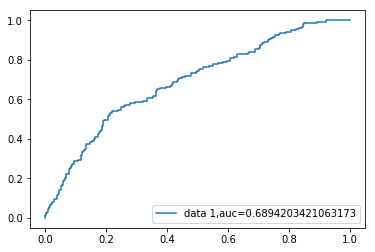

In [88]:
from sklearn import metrics
y_pred_proba = classifier.predict_proba(x_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="data 1,auc="+str(auc))
plt.legend(loc=4)
plt.show()